# Data Analysis

We shall visualize on the following topics -

#### A. Visualization
1. Spending Pattern
2. Stay Period
3. Activities

#### B. Market Basket Analysis
1. General Tour
2. Packaged Tour
3. Wildlife Tourism
4. Beach Tourism

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotnine import *

import pycountry_convert as pc

from mlxtend.frequent_patterns import apriori, association_rules
import datacompy
from scipy import stats

%matplotlib inline

### Load Data File

In [2]:
df = pd.read_csv(r'data/clean_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            4809 non-null   object 
 4   total_female           4809 non-null   float64
 5   total_male             4809 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

## 1. Spending Pattern

#### 1a. Spending Behaviour based on Purpose of Tour

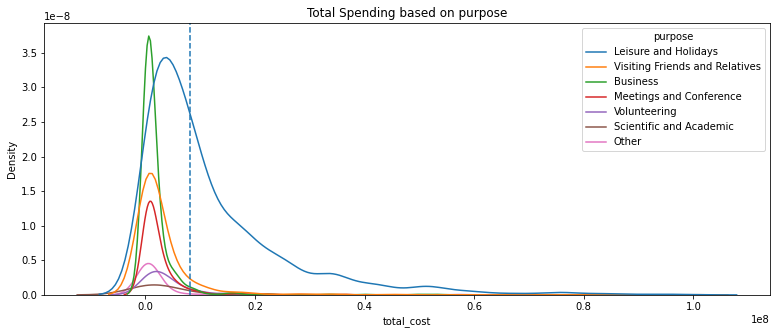

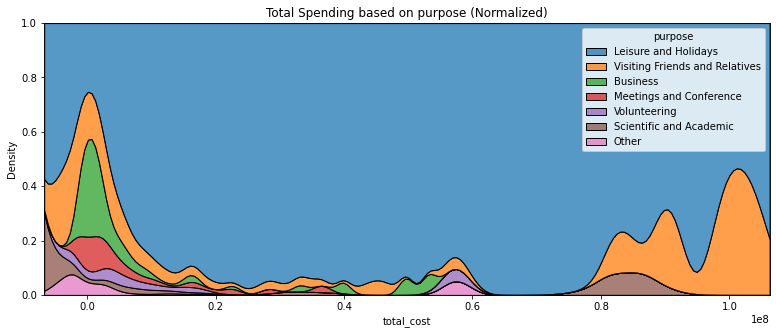

In [4]:
plt.figure(figsize=[13,5])
sns.kdeplot(data=df, x='total_cost', hue='purpose')
plt.title('Total Spending based on purpose')
plt.axvline(df['total_cost'].mean(), linestyle='dashed')
plt.show()

plt.figure(figsize=[13,5])
sns.kdeplot(data=df, x='total_cost', hue='purpose', multiple='fill')
plt.title('Total Spending based on purpose (Normalized)')
plt.show()

#### 1b. Spending Behaviour based on Age Group of the tourists

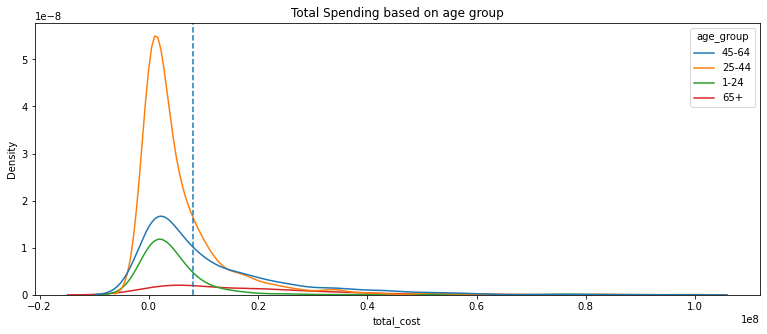

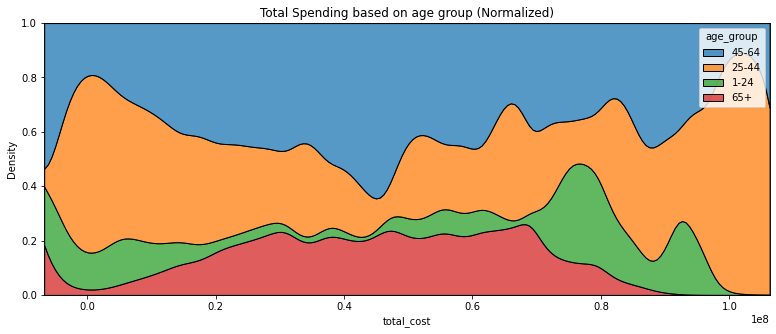

In [5]:
plt.figure(figsize=[13,5])
sns.kdeplot(data=df, x='total_cost', hue='age_group')
plt.title('Total Spending based on age group')
plt.axvline(df['total_cost'].mean(), linestyle='dashed')
plt.show()

plt.figure(figsize=[13,5])
sns.kdeplot(data=df, x='total_cost', hue='age_group', multiple='fill')
plt.title('Total Spending based on age group (Normalized)')
plt.show()

#### 3c. Frequency of tourists measured based on spending class

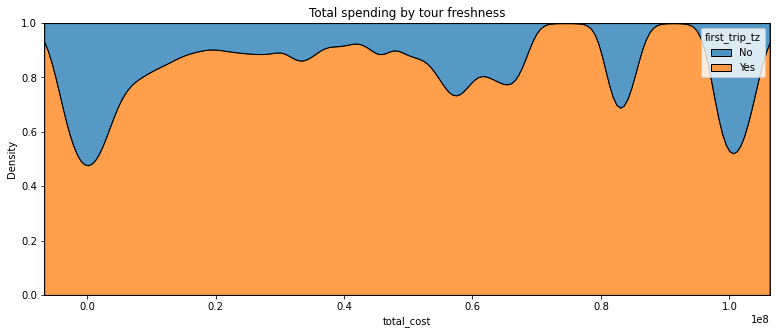

In [6]:
plt.figure(figsize=[13,5])
sns.kdeplot(data=df, x='total_cost', hue='first_trip_tz', multiple='fill')
plt.title("Total spending by tour freshness")
plt.show()

#### 1c. Spending Pattern for tour packages and Trip Frequency

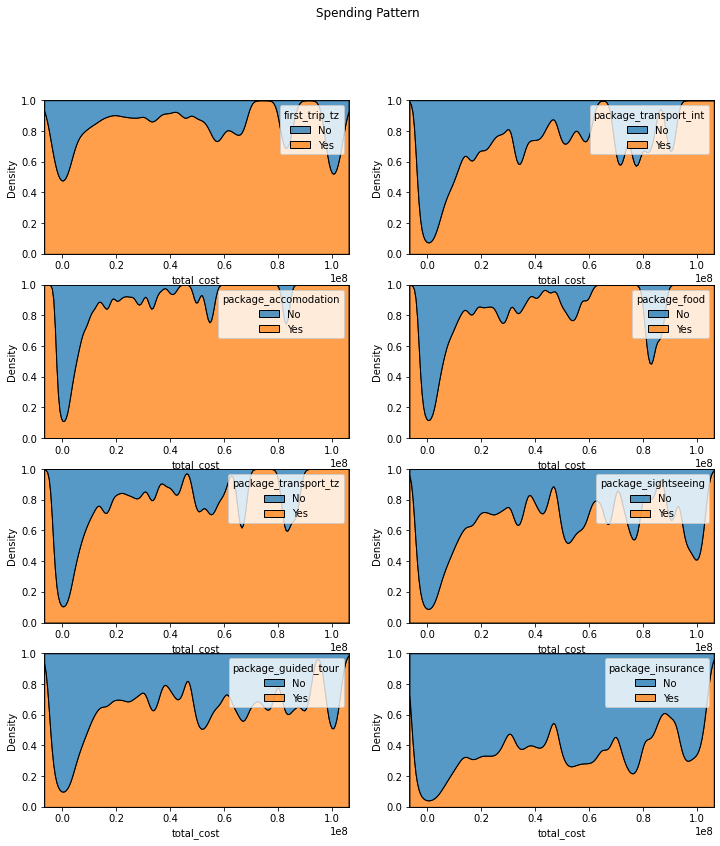

In [7]:
fig, axes = plt.subplots(4,2, figsize=(12,13))

fig.suptitle('Spending Pattern')

sns.kdeplot(ax=axes[0,0], data=df, x='total_cost', hue='first_trip_tz', multiple='fill')
sns.kdeplot(ax=axes[0,1], data=df, x='total_cost', hue='package_transport_int', multiple='fill')
sns.kdeplot(ax=axes[1,0], data=df, x='total_cost', hue='package_accomodation', multiple='fill')
sns.kdeplot(ax=axes[1,1], data=df, x='total_cost', hue='package_food', multiple='fill')
sns.kdeplot(ax=axes[2,0], data=df, x='total_cost', hue='package_transport_tz', multiple='fill')
sns.kdeplot(ax=axes[2,1], data=df, x='total_cost', hue='package_sightseeing', multiple='fill')
sns.kdeplot(ax=axes[3,0], data=df, x='total_cost', hue='package_guided_tour', multiple='fill')
sns.kdeplot(ax=axes[3,1], data=df, x='total_cost', hue='package_insurance', multiple='fill')

plt.show()

## 2. Stay Period

### Mainland

#### 2a. Male Tourists in Mainland

****************************** Male tourists staying in Mainland based on Age Group ******************************


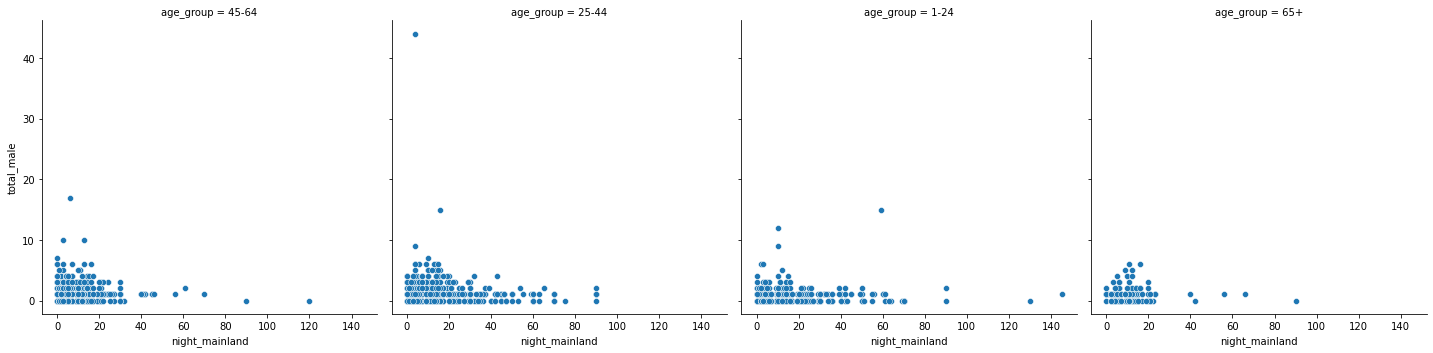

In [8]:
print('*'*30, 'Male tourists staying in Mainland based on Age Group', '*'*30)
sns.relplot(data=df, x='night_mainland', y='total_male', col='age_group')
plt.show()

#### 2b. Female Tourists in mainland

****************************** Female tourists staying in Mainland based on Age Group ******************************


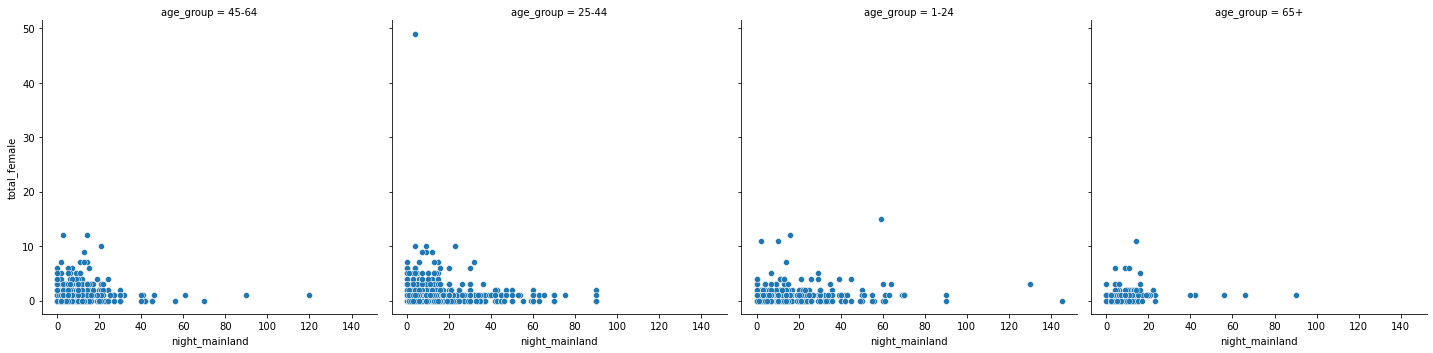

In [9]:
print('*'*30, 'Female tourists staying in Mainland based on Age Group', '*'*30)
sns.relplot(data=df, x='night_mainland', y='total_female', col='age_group')
plt.show()

#### 2c. Average number of tourists staying in Mainland

In [10]:
mn_df = df.groupby('night_mainland')[['total_male', 'total_female']].mean().reset_index()
mn_df.columns = ['night_mainland', 'total_male', 'total_female']

fig = go.Figure()
fig.add_trace(go.Scatter(x=mn_df['night_mainland'], y=mn_df['total_male'],
                        mode='lines',
                        name='Male tourists'))
fig.add_trace(go.Scatter(x=mn_df['night_mainland'], y=mn_df['total_female'],
                        mode='lines',
                        name='Female tourists'))
fig.update_layout(title='Average Number of Tourists staying in Mainland')
fig.show()

### Zanzibar

#### 2d. Male Tourists in Zanzibar

****************************** Male tourists staying in Zanzibar based on Age Group ******************************


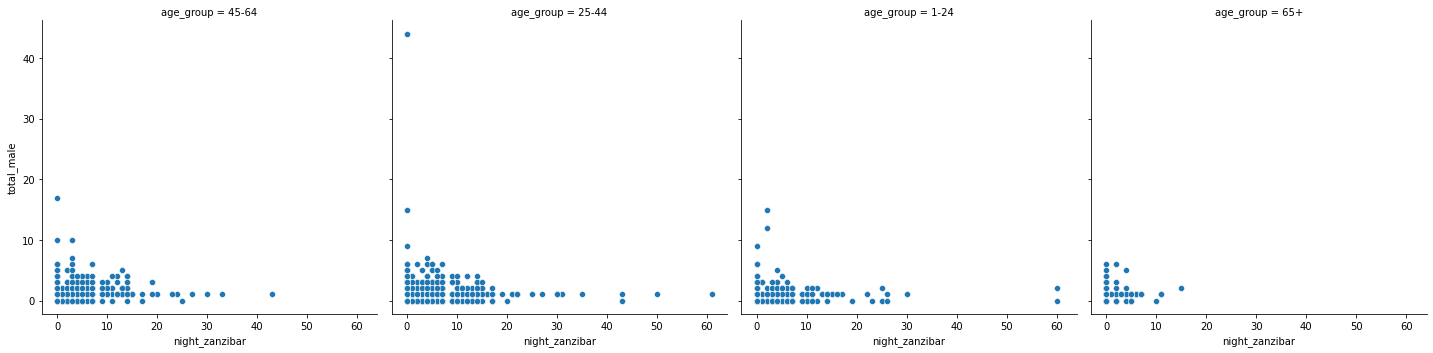

In [11]:
print('*'*30, 'Male tourists staying in Zanzibar based on Age Group', '*'*30)
sns.relplot(data=df, x='night_zanzibar', y='total_male', col='age_group')
plt.show()

#### 2e. Female Tourists in Zanzibar

****************************** Female tourists staying in Zanzibar based on Age Group ******************************


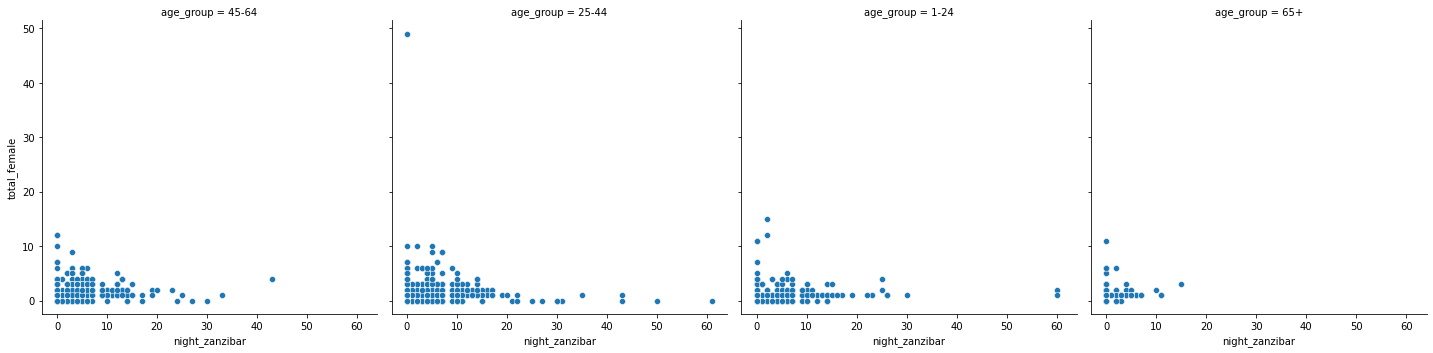

In [12]:
print('*'*30, 'Female tourists staying in Zanzibar based on Age Group', '*'*30)
sns.relplot(data=df, x='night_zanzibar', y='total_female', col='age_group')
plt.show()

#### 2f. Average Number of Tourists staying in Zanzibar

In [13]:
zn_df = df.groupby('night_zanzibar')[['total_male', 'total_female']].mean().reset_index()
zn_df.columns = ['night_zanzibar', 'total_male', 'total_female']

fig = go.Figure()
fig.add_trace(go.Scatter(x=zn_df['night_zanzibar'], y=zn_df['total_male'],
                        mode='lines',
                        name='Male tourists'))
fig.add_trace(go.Scatter(x=zn_df['night_zanzibar'], y=zn_df['total_female'],
                        mode='lines',
                        name='Female tourists'))
fig.update_layout(title='Average Number of Tourists staying in Zanzibar')
fig.show()

#### 2g. Packages bought relative to the stay period in Mainland

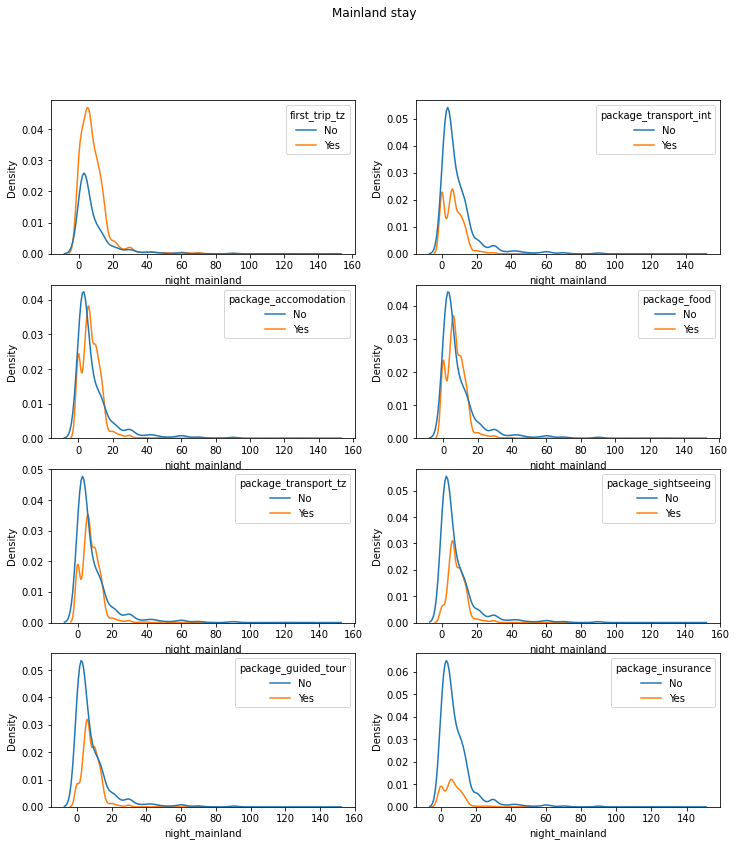

In [14]:
fig, axes = plt.subplots(4,2, figsize=(12,13))

fig.suptitle('Mainland stay')

sns.kdeplot(ax=axes[0,0], data=df, x='night_mainland', hue='first_trip_tz')
sns.kdeplot(ax=axes[0,1], data=df, x='night_mainland', hue='package_transport_int')
sns.kdeplot(ax=axes[1,0], data=df, x='night_mainland', hue='package_accomodation')
sns.kdeplot(ax=axes[1,1], data=df, x='night_mainland', hue='package_food')
sns.kdeplot(ax=axes[2,0], data=df, x='night_mainland', hue='package_transport_tz')
sns.kdeplot(ax=axes[2,1], data=df, x='night_mainland', hue='package_sightseeing')
sns.kdeplot(ax=axes[3,0], data=df, x='night_mainland', hue='package_guided_tour')
sns.kdeplot(ax=axes[3,1], data=df, x='night_mainland', hue='package_insurance')

plt.show()

#### 2h. Packages bought relative to stay period in Zanzibar

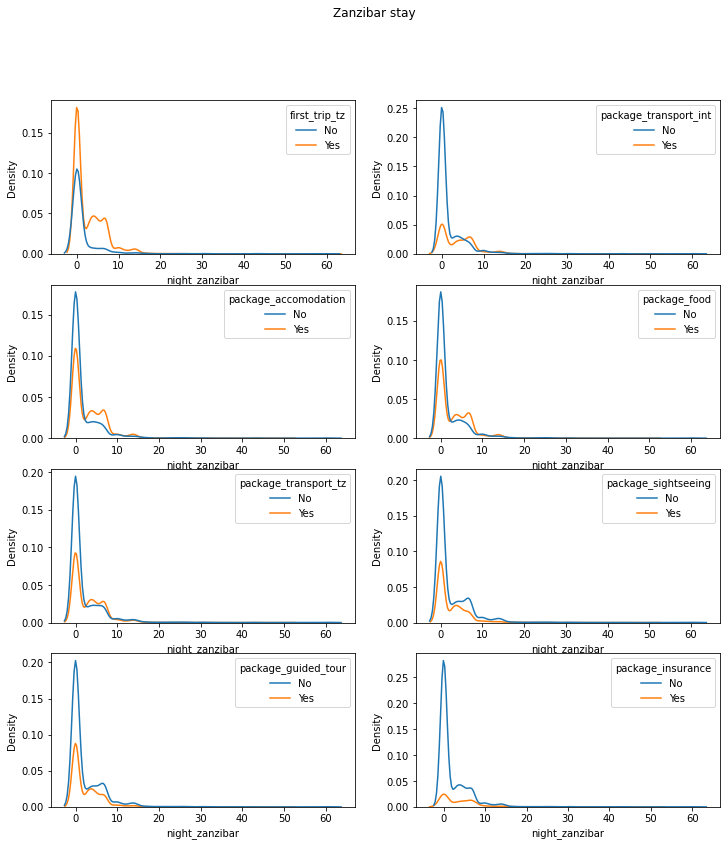

In [15]:
fig, axes = plt.subplots(4,2, figsize=(12,13))

fig.suptitle('Zanzibar stay')

sns.kdeplot(ax=axes[0,0], data=df, x='night_zanzibar', hue='first_trip_tz')
sns.kdeplot(ax=axes[0,1], data=df, x='night_zanzibar', hue='package_transport_int')
sns.kdeplot(ax=axes[1,0], data=df, x='night_zanzibar', hue='package_accomodation')
sns.kdeplot(ax=axes[1,1], data=df, x='night_zanzibar', hue='package_food')
sns.kdeplot(ax=axes[2,0], data=df, x='night_zanzibar', hue='package_transport_tz')
sns.kdeplot(ax=axes[2,1], data=df, x='night_zanzibar', hue='package_sightseeing')
sns.kdeplot(ax=axes[3,0], data=df, x='night_zanzibar', hue='package_guided_tour')
sns.kdeplot(ax=axes[3,1], data=df, x='night_zanzibar', hue='package_insurance')

plt.show()

## 3. Main Activity

#### 3a. Tour arrangements based on Main activity

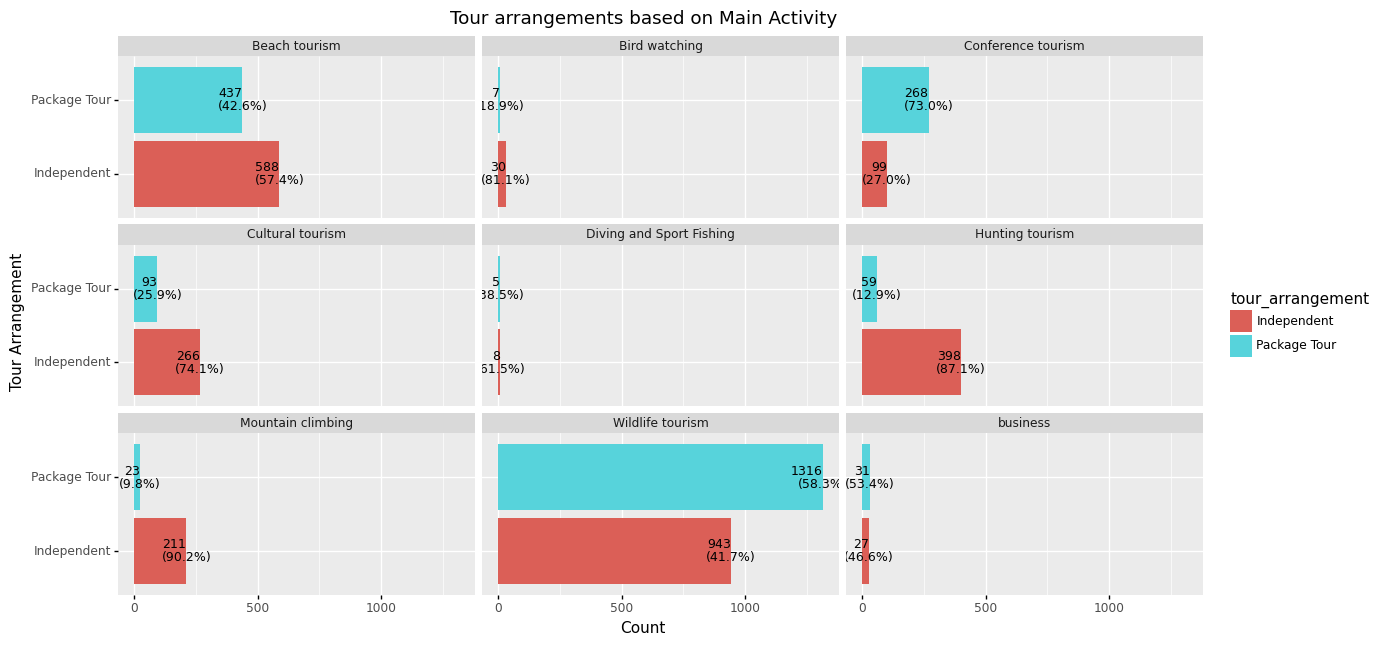

<ggplot: (8729859495413)>

In [16]:
(
    ggplot(df, aes('tour_arrangement', fill='tour_arrangement'))
    + geom_bar()
    + geom_text(
        aes(label=after_stat('count')), 
        stat='count',
        nudge_y=0.125,
        va='bottom',
        ha='right',
        size=9
        )
    + geom_text(
        aes(label=after_stat('prop*100'), group=1), 
        stat='count',
        nudge_y=0.125,
        va='top',
        ha='center',
        format_string='({:.1f}%)',
        size=9,
        position='fill'
        )
    + coord_flip()
    + scale_y_continuous(rescaler=range(-100, 1600))
    + facet_wrap('main_activity')
    + labs(x='Tour Arrangement', y='Count', title='Tour arrangements based on Main Activity')
    + theme(figure_size=(14, 7))
)

#### 3b. Tour Frequency based on Main Activity

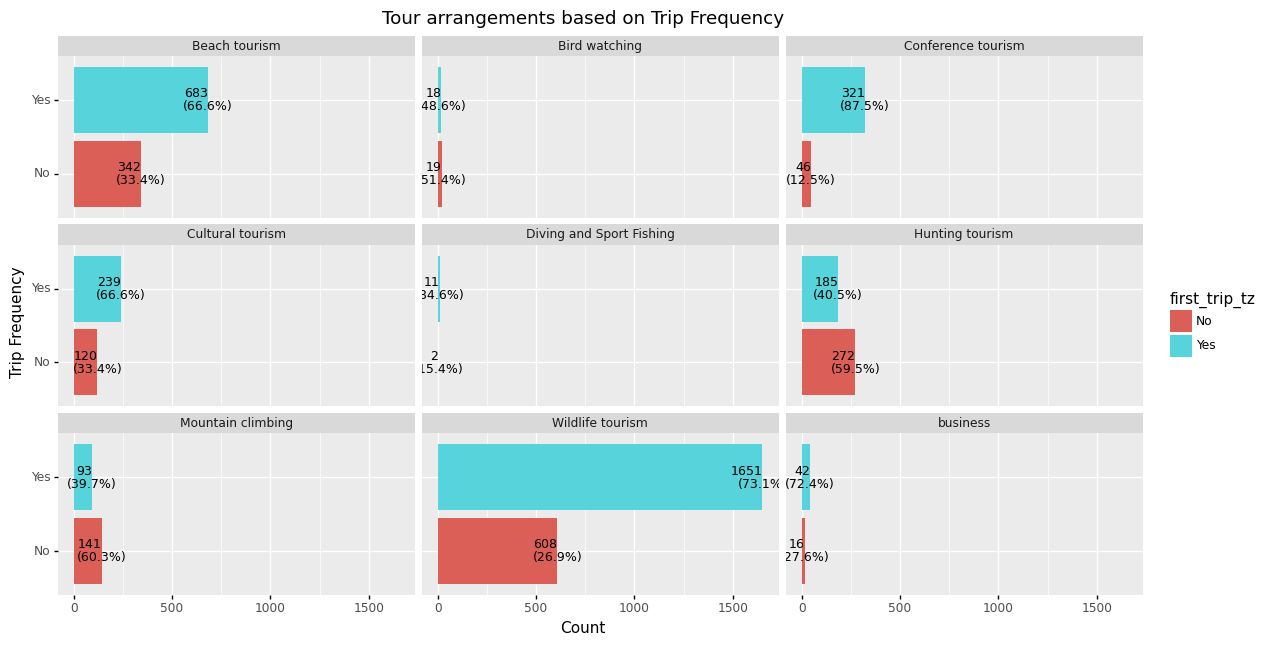

<ggplot: (8729867062161)>

In [17]:
(
    ggplot(df, aes('first_trip_tz', fill='first_trip_tz'))
    + geom_bar()
    + geom_text(
        aes(label=after_stat('count')), 
        stat='count',
        nudge_y=0.125,
        va='bottom',
        ha='right',
        size=9
        )
    + geom_text(
        aes(label=after_stat('prop*100'), group=1), 
        stat='count',
        nudge_y=0.125,
        va='top',
        ha='center',
        format_string='({:.1f}%)',
        size=9,
        position='fill'
        )
    + coord_flip()
    + scale_y_continuous(rescaler=range(-100, 1600))
    + facet_wrap('main_activity')
    + labs(x='Trip Frequency', y='Count', title='Tour arrangements based on Trip Frequency')
    + theme(figure_size=(14, 7))
)

## Feature Engineering

### Continent

In [18]:
def country_to_continent(c_name):
    """Function to get the continent name for the country name"""
    
    c_short = pc.country_name_to_country_alpha2(c_name) # Alpha values
    cont_code = pc.country_alpha2_to_continent_code(c_short) # Continent code
    cont_name = pc.convert_continent_code_to_continent_name(cont_code) # Continent name
    
    return cont_name

In [19]:
country_to_continent("United Kingdom")

'Europe'

In [20]:
df['continent'] = df['country'].apply(country_to_continent)

### Total Tourist

In [21]:
df['tourist_count'] = df['total_male'] + df['total_female']

### Expense per tourist

In [22]:
df['cost_per_tourist'] = df['total_cost'] / df['tourist_count']

## Hypothesis Test

### Expenditure per Tour

Do Package tours enjoy discounts or lower spending compared to Independent tours

**H0** : Independent tours and Package tours have similar spending

**H1** : Independent tours and Package tours dont have similar spending

In [24]:
t_value, p_value = stats.ttest_ind(df.query('tour_arrangement=="Independent"')['total_cost'], 
                                   df.query('tour_arrangement=="Package Tour"')['total_cost'])

alpha = 0.05

print("T-value for the T-test is %f"%float("{:.6f}".format(t_value)))

print("P-value for the T-test is %f"%p_value)

if p_value<=alpha:
    print('Conclusion:\n', '- Since P-value(=%f)'%p_value, '<', 'alpha(=%.2f),'%alpha, 
          'we reject the Null Hypothesis H0.\n',
          '- Independent tours and Packaged tours dont have similar type of spending.')

else:
    print('Conclusion:\n', '- Since P-value(=%f)'%p_value, '>', 'alpha(=%.2f)'%alpha, 
          'We fail to reject the Null Hypothesis H0.\n',
          '- Independent tours and Packaged tours have similar type of spending')

T-value for the T-test is -36.841473
P-value for the T-test is 0.000000
Conclusion:
 - Since P-value(=0.000000) < alpha(=0.05), we reject the Null Hypothesis H0.
 - Independent tours and Packaged tours dont have similar type of spending.


### Expenditure per Tourist

Does expenditure increase when the tour includes children.

**H0** : Bringing children in the tour doesnt affect the price of the tour.

**H1** : Bringing children in the tour does affect the price of the tour.

In [25]:
df['travel_with'].value_counts()

Alone                  2356
Spouse                 1018
Friends/Relatives       903
Spouse and Children     368
Children                164
Name: travel_with, dtype: int64

In [29]:
cond1 = df['travel_with']=="Spouse and Children"
cond2 = df['travel_with']=="Children"

t1, p1 = stats.ttest_ind(df[cond1 | cond2]['cost_per_tourist'],
                        df[~cond1 | cond2]['cost_per_tourist'])

alpha = 0.05

print("T-value for the T-test is %f"%float("{:.6f}".format(t1)))

print("P-value for the T-test is %f"%p1)

if p1<=alpha:
    print('Conclusion:\n', '- Since P-value(=%f)'%p1, '<', 'alpha(=%.2f),'%alpha, 
          'we reject the Null Hypothesis H0.\n',
          '- Bringing children in the tour does affect the expenditure of the tour')

else:
    print('Conclusion:\n', '- Since P-value(=%f)'%p1, '>', 'alpha(=%.2f)'%alpha, 
          'We fail to reject the Null Hypothesis H0.\n',
          '- Bringing children in the tour does not affect the expenditure of the tour')

T-value for the T-test is 0.917800
P-value for the T-test is 0.358768
Conclusion:
 - Since P-value(=0.358768) > alpha(=0.05) We fail to reject the Null Hypothesis H0.
 - Bringing children in the tour does not affect the expenditure of the tour


In [30]:
print(df[~cond1 | cond2]['cost_per_tourist'].mean(), df[cond1 | cond2]['cost_per_tourist'].mean())

4196097.013949457 4459995.891824203


## Market Basket Analysis

### General

#### Support

In [25]:
basket = df[['package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz',
             'package_sightseeing', 'package_guided_tour', 'package_insurance']]

basket.columns = [
    'int_transport', 'accomodation', 'food', 'tz_transport', 'sightseeing', 'guided_tour', 'insurance'
]

for i in basket.columns:
    basket[i].replace({'Yes': 1, 'No': 0}, inplace=True)

frequent_itemsets = apriori(basket, min_support=0.3, use_colnames=True)
frequent_itemsets

support                            itemsets
0   0.301934                     (int_transport)
1   0.458931                      (accomodation)
2   0.428571                              (food)
3   0.393013                      (tz_transport)
4   0.309836                       (sightseeing)
5   0.322312                       (guided_tour)
6   0.423789                (food, accomodation)
7   0.388022        (tz_transport, accomodation)
8   0.305885         (accomodation, sightseeing)
9   0.317530         (guided_tour, accomodation)
10  0.367436                (tz_transport, food)
11  0.363901  (tz_transport, food, accomodation)

In [26]:
res = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.9)
res

antecedents           consequents  antecedent support  \
0                        (food)        (accomodation)            0.428571   
1                (accomodation)                (food)            0.458931   
2                (tz_transport)        (accomodation)            0.393013   
3                 (sightseeing)        (accomodation)            0.309836   
4                 (guided_tour)        (accomodation)            0.322312   
5                (tz_transport)                (food)            0.393013   
6          (tz_transport, food)        (accomodation)            0.367436   
7  (tz_transport, accomodation)                (food)            0.388022   
8                (tz_transport)  (food, accomodation)            0.393013   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.458931  0.423789    0.988840  2.154659  0.227104   48.484472  
1            0.428571  0.423789    0.923425  2.154659  0.227104    7.462384  
2            0.458931  0.388022    0.987302  2.151306  0.207656   42.609170  
3            0.458931  0.305885    0.987248  2.151190  0.163692   42.431187  
4            0.458931  0.317530    0.985161  2.146643  0.169610   36.463334  
5            0.428571  0.367436    0.934921  2.181481  0.199002    8.780488  
6            0.458931  0.363901    0.990379  2.158012  0.195273   56.239331  
7            0.428571  0.363901    0.937835  2.188282  0.197606    9.192118  
8            0.423789  0.363901    0.925926  2.184876  0.197346    7.778852

### Package Tours

#### Support

In [27]:
basket_pk = df.query('tour_arrangement=="Package Tour"')[['package_transport_int', 'package_accomodation', 
                                                          'package_food', 'package_transport_tz',
                                                          'package_sightseeing', 'package_guided_tour', 
                                                          'package_insurance']]

basket_pk.columns = [
    'int_transport', 'accomodation', 'food', 'tz_transport', 'sightseeing', 'guided_tour', 'insurance'
]

for i in basket_pk.columns:
    basket_pk[i].replace({'Yes': 1, 'No': 0}, inplace=True)

frequent_itemsets_pk = apriori(basket_pk, min_support=0.6, use_colnames=True)
frequent_itemsets_pk

support                                   itemsets
0   0.639571                            (int_transport)
1   0.974989                             (accomodation)
2   0.912014                                     (food)
3   0.836534                             (tz_transport)
4   0.661903                              (sightseeing)
5   0.686914                              (guided_tour)
6   0.619920              (accomodation, int_transport)
7   0.901742                       (food, accomodation)
8   0.826262               (tz_transport, accomodation)
9   0.653863                (accomodation, sightseeing)
10  0.677535                (guided_tour, accomodation)
11  0.782492                       (tz_transport, food)
12  0.612327                        (food, sightseeing)
13  0.639125                        (guided_tour, food)
14  0.613220                (tz_transport, guided_tour)
15  0.774900         (tz_transport, food, accomodation)
16  0.608307          (food, accomodation, sightseeing)
17  0.634212          (guided_tour, food, accomodation)
18  0.607414  (tz_transport, guided_tour, accomodation)

In [28]:
res_pk = association_rules(frequent_itemsets_pk, metric='confidence', min_threshold=0.9)
res_pk

antecedents           consequents  antecedent support  \
0                (int_transport)        (accomodation)            0.639571   
1                         (food)        (accomodation)            0.912014   
2                 (accomodation)                (food)            0.974989   
3                 (tz_transport)        (accomodation)            0.836534   
4                  (sightseeing)        (accomodation)            0.661903   
5                  (guided_tour)        (accomodation)            0.686914   
6                 (tz_transport)                (food)            0.836534   
7                  (sightseeing)                (food)            0.661903   
8                  (guided_tour)                (food)            0.686914   
9           (tz_transport, food)        (accomodation)            0.782492   
10  (tz_transport, accomodation)                (food)            0.826262   
11                (tz_transport)  (food, accomodation)            0.836534   
12           (food, sightseeing)        (accomodation)            0.612327   
13   (accomodation, sightseeing)                (food)            0.653863   
14                 (sightseeing)  (food, accomodation)            0.661903   
15           (guided_tour, food)        (accomodation)            0.639125   
16   (guided_tour, accomodation)                (food)            0.677535   
17                 (guided_tour)  (food, accomodation)            0.686914   
18   (tz_transport, guided_tour)        (accomodation)            0.613220   

    consequent support   support  confidence      lift  leverage  conviction  
0             0.974989  0.619920    0.969274  0.994138 -0.003655    0.814000  
1             0.974989  0.901742    0.988737  1.014100  0.012538    2.220557  
2             0.912014  0.901742    0.924874  1.014100  0.012538    1.171176  
3             0.974989  0.826262    0.987720  1.013058  0.010650    2.036779  
4             0.974989  0.653863    0.987854  1.013195  0.008516    2.059253  
5             0.974989  0.677535    0.986346  1.011648  0.007801    1.831770  
6             0.912014  0.782492    0.935398  1.025639  0.019561    1.361961  
7             0.912014  0.612327    0.925101  1.014349  0.008662    1.174728  
8             0.912014  0.639125    0.930429  1.020191  0.012649    1.264692  
9             0.974989  0.774900    0.990297  1.015701  0.011978    2.577621  
10            0.912014  0.774900    0.937838  1.028315  0.021337    1.415422  
11            0.901742  0.774900    0.926321  1.027258  0.020562    1.333605  
12            0.974989  0.608307    0.993435  1.018920  0.011295    3.810034  
13            0.912014  0.608307    0.930328  1.020080  0.011975    1.262854  
14            0.901742  0.608307    0.919028  1.019170  0.011442    1.213488  
15            0.974989  0.634212    0.992313  1.017769  0.011072    3.253725  
16            0.912014  0.634212    0.936058  1.026363  0.016290    1.376024  
17            0.901742  0.634212    0.923277  1.023882  0.014793    1.280687  
18            0.974989  0.607414    0.990532  1.015942  0.009531    2.641564

### Wildlife Tourism

    Since wildlife tourism in Tanzania sees the highest number of tours, we shall look at the packages bought for this segment.

In [29]:
basket_wild = df.query('tour_arrangement=="Package Tour"' and 'main_activity == "Wildlife tourism"')[['package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz',
             'package_sightseeing', 'package_guided_tour', 'package_insurance']]

basket_wild.columns = [
    'int_transport', 'accomodation', 'food', 'tz_transport', 'sightseeing', 'guided_tour', 'insurance'
]

for i in basket_wild.columns:
    basket_wild[i].replace({'Yes': 1, 'No': 0}, inplace=True)

frequent_itemsets_wild = apriori(basket_wild, min_support=0.5, use_colnames=True)
frequent_itemsets_wild

support                      itemsets
0  0.575919                (accomodation)
1  0.541833                        (food)
2  0.522355                (tz_transport)
3  0.536963          (food, accomodation)
4  0.516600  (tz_transport, accomodation)

In [30]:
res_wild = association_rules(frequent_itemsets_wild, metric='confidence', min_threshold=0.95)
res_wild

antecedents     consequents  antecedent support  consequent support  \
0          (food)  (accomodation)            0.541833            0.575919   
1  (tz_transport)  (accomodation)            0.522355            0.575919   

    support  confidence      lift  leverage  conviction  
0  0.536963    0.991013  1.720752  0.224912   47.188700  
1  0.516600    0.988983  1.717227  0.215766   38.493547

### Beach Tourism

In [31]:
basket_beach = df.query('tour_arrangement=="Package Tour"' and 'main_activity == "Beach tourism"')[['package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz',
             'package_sightseeing', 'package_guided_tour', 'package_insurance']]

basket_beach.columns = [
    'int_transport', 'accomodation', 'food', 'tz_transport', 'sightseeing', 'guided_tour', 'insurance'
]

for i in basket_beach.columns:
    basket_beach[i].replace({'Yes': 1, 'No': 0}, inplace=True)

frequent_itemsets_beach = apriori(basket_beach, min_support=0.3, use_colnames=True)
frequent_itemsets_beach

support                             itemsets
0  0.389268                      (int_transport)
1  0.419512                       (accomodation)
2  0.395122                               (food)
3  0.320976                       (tz_transport)
4  0.375610        (accomodation, int_transport)
5  0.354146                (food, int_transport)
6  0.389268                 (food, accomodation)
7  0.316098         (tz_transport, accomodation)
8  0.348293  (food, accomodation, int_transport)

In [32]:
res_beach = association_rules(frequent_itemsets_beach, metric='confidence', min_threshold=0.9)
res_beach

antecedents     consequents  antecedent support  \
0                (int_transport)  (accomodation)            0.389268   
1                (int_transport)          (food)            0.389268   
2                         (food)  (accomodation)            0.395122   
3                 (accomodation)          (food)            0.419512   
4                 (tz_transport)  (accomodation)            0.320976   
5          (food, int_transport)  (accomodation)            0.354146   
6  (accomodation, int_transport)          (food)            0.375610   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.419512  0.375610    0.964912  2.300082  0.212307   16.543902  
1            0.395122  0.354146    0.909774  2.302516  0.200338    6.704065  
2            0.419512  0.389268    0.985185  2.348407  0.223510   39.182927  
3            0.395122  0.389268    0.927907  2.348407  0.223510    8.390244  
4            0.419512  0.316098    0.984802  2.347494  0.181444   38.196098  
5            0.419512  0.348293    0.983471  2.344321  0.199724   35.119512  
6            0.395122  0.348293    0.927273  2.346801  0.199881    8.317073

In [33]:
df['main_activity'].value_counts()

Wildlife tourism            2259
Beach tourism               1025
Hunting tourism              457
Conference tourism           367
Cultural tourism             359
Mountain climbing            234
business                      58
Bird watching                 37
Diving and Sport Fishing      13
Name: main_activity, dtype: int64

## Observations

### Tour Package purchase pattern

##### Relative to Total spending on package:
1. Tourists dont opt for **Insurance packages** offered for their tour.
2. Customer **accomodation** and **food** package seem popular throughout all spending class
3. High spending tourists opt for **Tanzania transport package** but are less likely to add the **International transport package** in their tour.

##### Relative to Stay period
1. Many tourists planning for _60-90 days_ **stay in Mainland** opt for tour packages, while a large portion dont opt for any of the packages provided.
2. The tourists visiting **Zanzibar** also show similar pattern like the ones staying in mainland.

### Tour Activities

1. There is a high potential for **wildlife tourism** and **Beach tourism**, so these areas should focus on how to get the tourists to revisit.
2. Tourists also seem very interested in **Mountain Climbing** and **Conference Tourism domain**.
3. Focus on improving package tours for **Beach tourism**, **Cultural tourism** and **Mountain Climbing**.

### Stay Period

1. Tourists between **1-24** and **25-44** age groups stay longer than the other age groups in **Mainland**.
2. While tourists from **1-24**, **25-44** and **45-64** age groups stay longer than **65+** age groups in **Zanzibar**.
3. The total cost of the tour isnt affected by the number of nights spent in **Zanzibar**.
4. There's also no significant difference in the spending pattern within different age groups.
5. Ideally the average number of **female tourists** arriving in **Zanzibar** are _more_ compared to the **male tourists**.

### Market Basket Analysis

1. **Food** and **Accomodation** Package seems to be the most commonly bought tour packages and are 90% more likely to buy food with accomodation package.
2. For _36%_ of the tours, **Tanzania transport package** seemed more likely to be bought with **Food** and **Accomodation** Package.
3. For _30%_ of the tours, **accomodation** packages were bought with **sight seeing** and **guided tour packages** each.
4. Under **Wildlife Tourism** tourists buy **Accomodation package** for _51%_ and _53%_ with **Tanzania transport package** and **Food package** of the tours.
5. While under **Beach Tourism**, tourists opt for **International transport package** for _35%_ and _37%_ with **Food package** and **Accomodation package**.